In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('day.csv')
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
data.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data['holiday'].value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [6]:
data.drop(['holiday','instant'],1,inplace=True)

In [7]:
data.corr()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
weekday,-0.003080,-0.005461,0.009509,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.229046,-0.011817,-0.207502,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545


In [8]:
# Heat map without normalization
import seaborn as sns

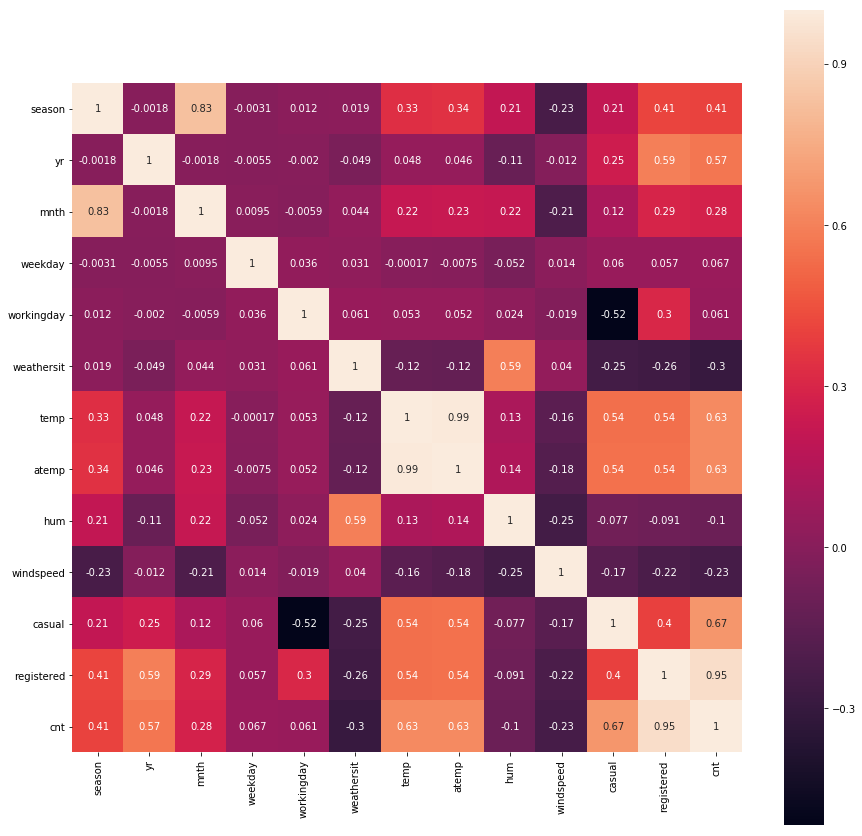

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,square=True)

In [10]:
col_list= list(data)
col_list

['season',
 'yr',
 'mnth',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df = scalar.fit_transform(data)

In [12]:
df = pd.DataFrame(df)
df.columns = col_list

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [14]:
lin_reg = LinearRegression()

In [15]:
x = data.drop(['cnt'],1)
y = data['cnt']

In [16]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.3,random_state=42)

In [17]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = lin_reg.predict(x_test)

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test,y_pred)

1.0

## Pearson Heat Map 
#(feature selection)

In [21]:
df

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174
4,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546
5,0.0,0.0,0.0,0.666667,1.0,0.0,0.180948,0.202329,0.532916,0.138482,0.025235,0.216286,0.182237
6,0.0,0.0,0.0,0.833333,1.0,0.5,0.171197,0.170340,0.512798,0.301676,0.042840,0.193763,0.171192
7,0.0,0.0,0.0,1.000000,0.0,0.5,0.131919,0.109191,0.550985,0.503869,0.019366,0.125758,0.107800
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.098690,0.048706,0.446444,0.700017,0.015258,0.107999,0.092039
9,0.0,0.0,0.0,0.166667,1.0,0.0,0.114266,0.094271,0.496573,0.414115,0.011444,0.181923,0.149448


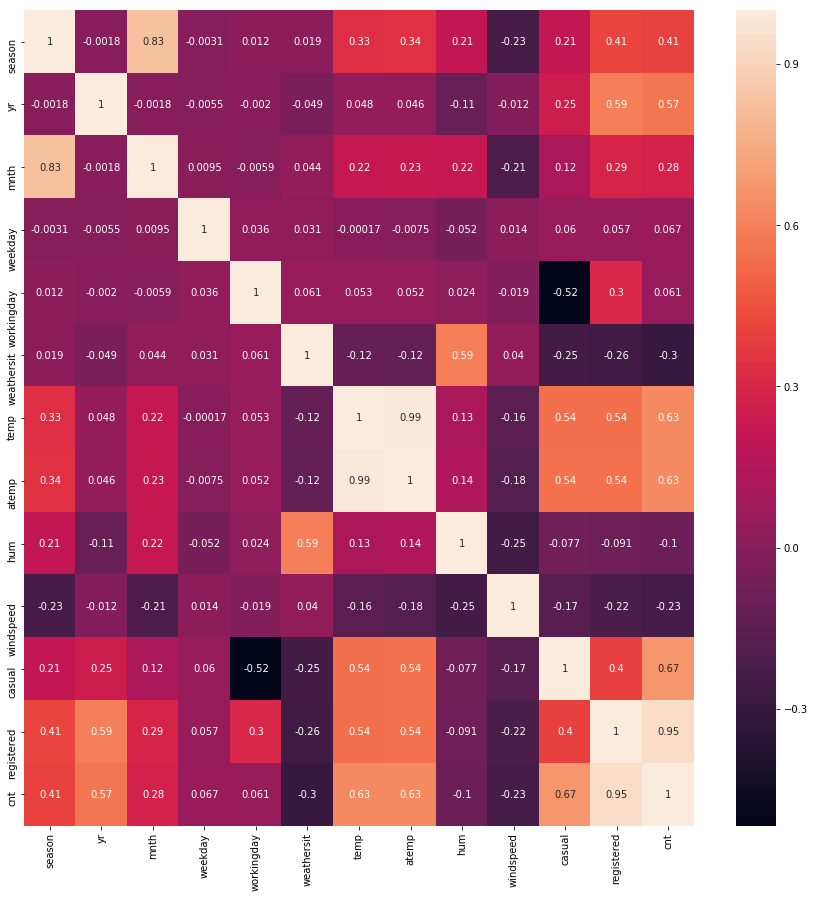

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [23]:
# x= df[['casual','registered']]
x= df[['registered']]
y = df['cnt']

In [24]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.3,random_state=42)

In [25]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = lin_reg.predict(x_test)

In [27]:
r2_score(y_test,y_pred)

0.9161130012498736

In [167]:
import statsmodels.api as sm

In [168]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174
4,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546


In [169]:
df = sm.add_constant(df)

C:\Users\Ajay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [170]:
df.head()

,const,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,1.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,1.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174
4,1.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546


In [171]:
y = df['cnt']
x = df.drop(['cnt'],1)

In [172]:
model = sm.OLS(y,x).fit()

In [174]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.982e+29
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:30:38   Log-Likelihood:                 23476.
No. Observations:                 731   AIC:                        -4.693e+04
Df Residuals:                     718   BIC:                        -4.687e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.035e-15    7.8e-16      1.326      0.185   -4.97e-16    2.57e-15
season      4.354e-16   5.58e-16      0.781      0.435    -6.6e-16    1.53e-15
yr          8.496e-16   3.37e-16      2.520      0.012    1.88e-16    1.51e-15
mnth        1.301e-16   5.95e-16      0.219      0.827   -1.04e-15     1.3e-15
weekday     2.914e-16   3.12e-16      0.934      0.350   -3.21e-16    9.04e-16
workingday  1.995e-17   3.79e-16      0.053      0.958   -7.24e-16    7.64e-16
weathersit -5.295e-16   5.18e-16     -1.023      0.307   -1.55e-15    4.87e-16
temp        2.192e-16   3.56e-15      0.062      0.951   -6.77e-15    7.21e-15
atemp       -1.57e-16   3.84e-15     -0.041      0.967   -7.69e-15    7.37e-15
hum         1.434e-15   9.72e-16      1.476      0.140   -4.74e-16    3.34e-15
windspeed  -7.199e-16   7.14e-16     -1.008      0.314   -2.12e-15    6.82e-16
casual         0.3921   9.46e-16   4.14e+14      0.000       0.392       0.392
registered     0.7968   1.11e-15   7.19e+14      0.000       0.797       0.797
==============================================================================
Omnibus:                       13.547   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.219
Skew:                           0.076   Prob(JB):                       0.0164
Kurtosis:                       2.504   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
from sklearn.linear_model import Ridge

In [177]:
ridge = Ridge(alpha=1) 

In [ ]:
ridge.fit()